<a href="https://colab.research.google.com/github/MaryBakatova/-/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%81%D0%BA%D0%B0%D0%BC%D0%B8_%D0%B4%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%B0%D1%82%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Часть_2

### 1. Пропущенные значения

1.1. Удаление строк с пропусками (если допустимо)

In [ ]:
from scipy.stats import mode
import pandas as pd

In [ ]:
import pandas as pd

In [ ]:
# Загрузка данных
df = pd.read_csv('/content/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# среднее_значение
mean_value = df.mean()
mean_value

,0
fixed acidity,8.319637
volatile acidity,0.527821
citric acid,0.270976
residual sugar,2.538806
chlorides,0.087467
free sulfur dioxide,15.874922
total sulfur dioxide,46.467792
density,0.996747
pH,3.311113
sulphates,0.658149


In [ ]:
# стандартное отклонение
std_deviation = df.std()
std_deviation

,0
fixed acidity,1.741096
volatile acidity,0.179060
citric acid,0.194801
residual sugar,1.409928
chlorides,0.047065
free sulfur dioxide,10.460157
total sulfur dioxide,32.895324
density,0.001887
pH,0.154386
sulphates,0.169507


In [ ]:
# median
median_value = df.median()
median_value

,0
fixed acidity,7.90000
volatile acidity,0.52000
citric acid,0.26000
residual sugar,2.20000
chlorides,0.07900
free sulfur dioxide,14.00000
total sulfur dioxide,38.00000
density,0.99675
pH,3.31000
sulphates,0.62000


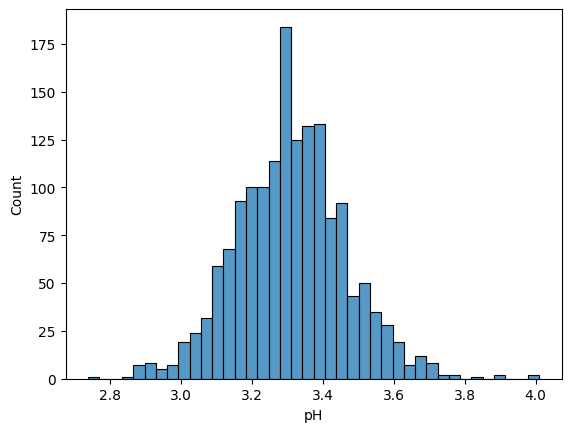

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = df, x=df['pH'])
plt.show()

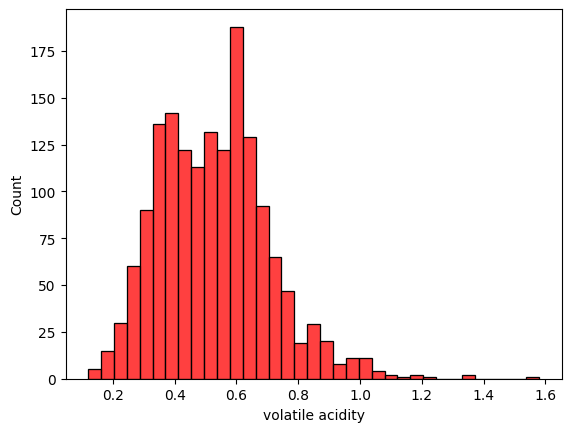

In [ ]:
sns.histplot(data = df, x=df['volatile acidity'], color = 'red')
plt.show()

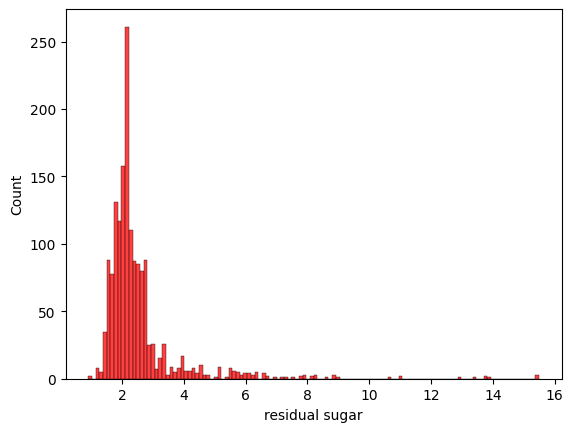

In [ ]:
sns.histplot(data = df, x=df['residual sugar'], color = 'red')
plt.show()

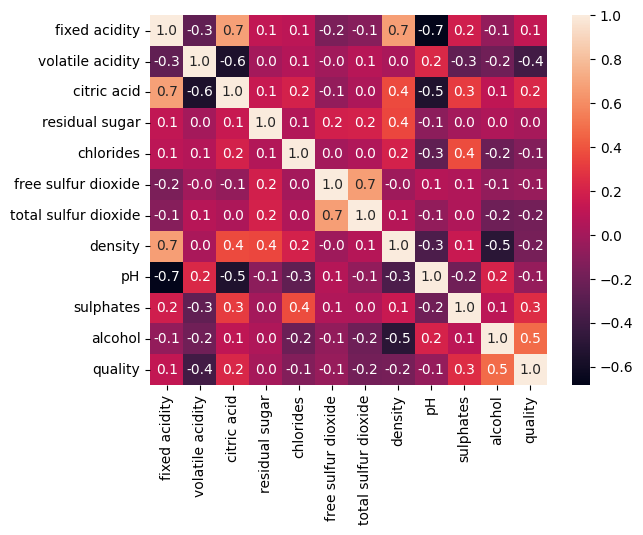

In [ ]:
correlation_matrix = df.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot = True, fmt=".1f")
plt.show()

In [ ]:
df_clean = df.drop_duplicates()
df_clean.shape

(1359, 12)

In [ ]:
numeric_coluns = df_clean.select_dtypes(include=['number']).columns
numeric_coluns = numeric_coluns[:-1]
numeric_coluns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[numeric_coluns])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_coluns)
scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374
...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.869983,0.494756,-0.983977,-0.461157,-0.407702,1.159265,-0.264277,-0.106490,0.711149,0.945435,-0.861924
1355,-1.215536,0.385444,-0.983977,-0.387183,0.038015,1.542281,-0.084619,-0.968269,0.904724,-0.461331,0.062574
1356,-1.388312,0.112167,-0.881656,-0.239233,-0.529261,2.212559,0.124983,-0.850510,1.356397,0.593744,0.709723
1357,-1.388312,0.631395,-0.779336,-0.387183,-0.265883,1.542281,-0.084619,-0.663167,1.679021,0.300667,-0.214775


In [ ]:
scaled_df['density/pH'] = scaled_df['density']/scaled_df['pH']

In [ ]:
scaled_df['fixed acidity*pH'] = scaled_df['fixed acidity']*scaled_df['pH']

In [ ]:
scaled_df.drop(columns=['fixed acidity*pH'], inplace=True)

In [ ]:
scaled_df.drop(columns=['fixed acidity/pH'], inplace=True)

In [ ]:
scaled_df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,density/pH,residual sugar/alcohol
0,-0.524431,0.932,-1.393258,-0.461157,-0.245623,-0.468554,-0.38405,0.584003,1.291872,-0.578561,-0.954374,0.45206,2.069521


In [ ]:
from imblearn.over_sampling import SMOTE

X = scaled_df
y = df_clean['quality']

In [ ]:
smote = SMOTE(random_state = 23423)
X_resample, y_resample = smote.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.01, random_state=43)

print('Размеры тренировочной выборки X:', len(X_train))
print('Размеры тестовой выборки X:', len(X_test))

print('Размеры тренировочной выборки y:', len(y_train))
print('Размеры тестовой выборки y:', len(y_test))


Размеры тренировочной выборки X: 3427
Размеры тестовой выборки X: 35
Размеры тренировочной выборки y: 3427
Размеры тестовой выборки y: 35


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter = 10000, penalty='l2', tol=0.001, warm_start=True, solver='lbfgs', n_jobs=4, dual=False, C=0.7)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy: .4f}")

Точность модели:  0.8000


In [ ]:
0.7143

In [ ]:
# summarize the sonar dataset
from pandas import read_csv
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(208, 60) (208,)


In [ ]:
!pip install tpot

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.1/215.1 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.1 MB/s eta 0:00:00
  Created wheel for configspace: filename=configspace-1.2.1-py3-none-any.whl size=115990 sha256=52b97877ce5f7d03bbf1fb8003ea3a0c944a082f0c48dc

In [ ]:
# example of tpot for the sonar classification dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# minimally prepare dataset
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X, y)
# export the best model
model.export('tpot_sonar_best_model.py')

TypeError: TPOTEstimator.__init__() got an unexpected keyword argument 'scoring'

1.9. Разделение данных на группы и обработка каждой группы отдельно

Если в вашем наборе данных есть несколько групп (например, по категориям), можно применить разные стратегии заполнения для каждой группы.

In [ ]:
for group_name, group_df in df.groupby(['category_column']):
    if group_name == 'group_A':
        group_df.fillna(group_df.mean(), inplace=True)
    elif group_name == 'group_B':
        group_df.fillna(group_df.median(), inplace=True)
    else:
        group_df.fillna(-9999, inplace=True)

1.10. Создание признака-индикатора наличия пропуска

Можно создать дополнительный признак, который будет указывать на наличие пропуска. Этот подход полезен, если вам нужно учесть факт отсутствия данных в модели.

In [ ]:
df['is_missing'] = df['колонка'].isnull().astype(int)
df['колонка'].fillna(0, inplace=True)

1.11. Мультивариантная интерполяция

Если ваши данные имеют сложную структуру и содержат множественные взаимосвязанные переменные, можно использовать методы мультивариантной интерполяции. Эти методы учитывают влияние нескольких переменных одновременно для восстановления пропущенных значений.

Например, можно использовать метод MICE (Multiple Imputations by Chained Equations), который позволяет создавать несколько версий восстановленных данных и далее комбинирует их для получения более точного результата.

In [ ]:
!pip install fancyimpute

In [ ]:
from fancyimpute import MICE

X_imputed = MICE().complete(X)

ImportError: cannot import name 'MICE' from 'fancyimpute' (/usr/local/lib/python3.11/dist-packages/fancyimpute/__init__.py)

1.12. Моделирование с использованием временных рядов

Если ваши данные представляют собой временные ряды, можно воспользоваться методами прогнозирования временных рядов для восполнения пропущенных значений. Такие методы включают ARIMA, SARIMAX и другие.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(endog=series, order=(p, d, q))
fitted = model.fit(disp=False)
forecast = fitted.forecast(steps=1)[0]

1.13. Анализ главных компонент (PCA)

Метод главных компонент может использоваться для реконструкции данных с пропущенными значениями. После выполнения PCA можно восстановить исходные данные с учетом оставшейся дисперсии.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_reconstructed = pca.inverse_transform(pca.transform(X))

1.14. Применение байесовского подхода

Байесовский подход позволяет учитывать априорные знания о структуре данных и неопределенности в процессе заполнения пропущенных значений. Одним из примеров является Bayesian Ridge Regression.

In [ ]:
from sklearn.linear_model import BayesianRidge

regressor = BayesianRidge()
X_imputed = regressor.predict(X)

1.15. Методы кластеризации

Кластеризация данных может помочь сгруппировать наблюдения по схожести и использовать характеристики кластеров для заполнения пропущенных значений. Например, можно использовать k-means или hierarchical clustering.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(X)

1.16. Deep Learning Approaches

Современные подходы глубокого обучения, такие как Autoencoders и Generative Adversarial Networks (GANs), также могут применяться для восстановления пропущенных значений.

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

input_layer = Input(shape=(n_features,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(n_features, activation="sigmoid")(encoder)
autoencoder = Model(input_layer, decoder)

--------------------------------------------------------------------

## 2. Дубликаты

In [ ]:
df['alcohol'].nunique()

65

2.1. Обработка дубликатов

In [ ]:
# Удаление всех строк-дубликатов
df.drop_duplicates(inplace=True)

# Можно удалить дубликаты по конкретному столбцу или набору столбцов
#df.drop_duplicates(subset=['column_name'], keep='first', inplace=True)
# keep='first говорит о том, что первую строчку оставляем, а остальные дубли убираем

2.2. Прямое сравнение

Самый простой метод, но требует O(n²) операций:

In [ ]:
def find_duplicates_simple(data):
    duplicates = []
    seen = set()
    for i, row in enumerate(data):
        if str(row) in seen:
            duplicates.append(i)
        seen.add(str(row))
    return duplicates

find_duplicates_simple(df)

[]

2.3. Группировка

Эффективный метод для больших датасетов:

In [ ]:
import pandas as pd

def find_duplicates_groupby(df):
    return df[df.duplicated(keep=False)].index.tolist()

# Пример использования
df = pd.DataFrame({
    'name': ['Иван', 'Петр', 'Иван', 'Мария', 'Петр'],
    'age': [25, 30, 25, 28, 30]
})
duplicates = find_duplicates_groupby(df)

2.4. Хеширование

Быстрый метод для больших наборов данных:

In [ ]:
def find_duplicates_hashing(data):
    hash_dict = {}
    duplicates = []

    for i, row in enumerate(data):
        row_hash = hash(str(row))
        if row_hash in hash_dict:
            duplicates.append((hash_dict[row_hash], i))
        else:
            hash_dict[row_hash] = i

    return duplicates

find_duplicates_hashing(df)

[]

2.5. Быстрое сравнение с использованием numpy

Оптимизированный метод для числовых данных:

In [ ]:
import numpy as np

def find_duplicates_numpy(data):
    _, indices = np.unique(data, axis=0, return_inverse=True)
    unique_counts = np.bincount(indices)
    duplicate_indices = np.where(unique_counts > 1)[0]
    return [(i, np.where(indices == idx)[0])
            for idx, i in enumerate(duplicate_indices)]

find_duplicates_numpy(df)

[(np.int64(14), array([45])),
 (np.int64(30), array([95])),
 (np.int64(31), array([821])),
 (np.int64(35), array([1270])),
 (np.int64(51), array([1114])),
 (np.int64(57), array([588])),
 (np.int64(59), array([1321])),
 (np.int64(65), array([94])),
 (np.int64(78), array([553])),
 (np.int64(87), array([1228])),
 (np.int64(101), array([695])),
 (np.int64(120), array([1157])),
 (np.int64(124), array([802])),
 (np.int64(134), array([34])),
 (np.int64(137), array([142, 144])),
 (np.int64(160), array([230])),
 (np.int64(161), array([1377])),
 (np.int64(167), array([1300])),
 (np.int64(169), array([1475])),
 (np.int64(172), array([1477])),
 (np.int64(173), array([444])),
 (np.int64(178), array([916])),
 (np.int64(182), array([1111])),
 (np.int64(185), array([1537])),
 (np.int64(189), array([1316])),
 (np.int64(199), array([1591])),
 (np.int64(200), array([198])),
 (np.int64(208), array([1269])),
 (np.int64(210), array([49])),
 (np.int64(211), array([1574])),
 (np.int64(218), array([131, 132]))

2.6. Похожие записи (fuzzy matching)

Для поиска похожих, но не идентичных записей:

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def find_similar_records(data, threshold=80):
    similar_pairs = []
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            similarity = fuzz.ratio(str(data[i]), str(data[j]))
            if similarity >= threshold:
                similar_pairs.append((i, j, similarity))
    return similar_pairs

find_similar_records(df['density'], threshold=80)

/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[(0, 1, 83),
 (0, 2, 91),
 (0, 3, 91),
 (0, 4, 100),
 (0, 5, 100),
 (0, 8, 83),
 (0, 9, 100),
 (0, 11, 100),
 (0, 13, 83),
 (0, 14, 83),
 (0, 15, 83),
 (0, 17, 83),
 (0, 18, 83),
 (0, 20, 83),
 (0, 21, 83),
 (0, 23, 83),
 (0, 24, 83),
 (0, 28, 83),
 (0, 30, 83),
 (0, 34, 83),
 (0, 35, 83),
 (0, 36, 83),
 (0, 37, 83),
 (0, 39, 100),
 (0, 40, 100),
 (0, 41, 83),
 (0, 42, 83),
 (0, 43, 83),
 (0, 46, 91),
 (0, 48, 83),
 (0, 50, 83),
 (0, 53, 91),
 (0, 55, 100),
 (0, 56, 83),
 (0, 57, 83),
 (0, 58, 83),
 (0, 60, 91),
 (0, 61, 83),
 (0, 62, 83),
 (0, 66, 83),
 (0, 70, 83),
 (0, 73, 83),
 (0, 74, 83),
 (0, 75, 83),
 (0, 76, 83),
 (0, 78, 83),
 (0, 79, 83),
 (0, 80, 83),
 (0, 81, 83),
 (0, 82, 91),
 (0, 86, 83),
 (0, 88, 100),
 (0, 89, 100),
 (0, 91, 83),
 (0, 92, 83),
 (0, 94, 83),
 (0, 98, 83),
 (0, 99, 83),
 (0, 100, 83),
 (0, 102, 83),
 (0, 103, 83),
 (0, 105, 83),
 (0, 106, 83),
 (0, 108, 83),
 (0, 113, 83),
 (0, 116, 100),
 (0, 117, 91),
 (0, 122, 91),
 (0, 123, 83),
 (0, 125, 83),
 (0, 

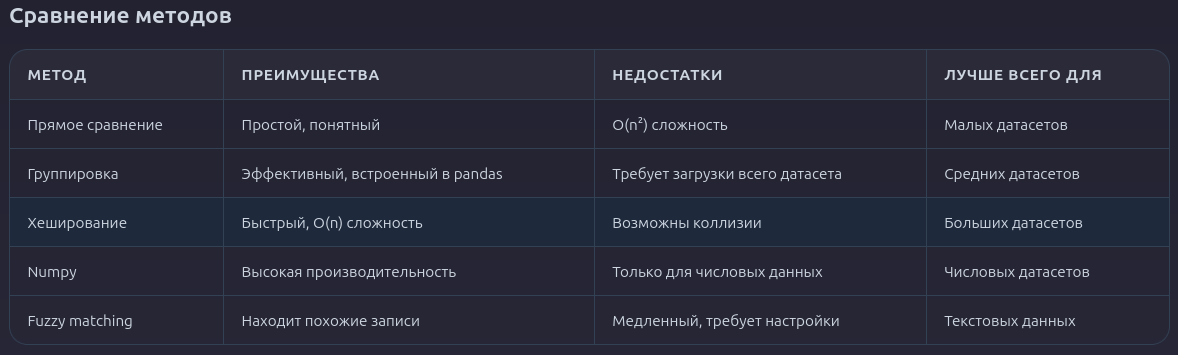

----------------------------------------------------------------------------

## 3. Поиск ошибок в датафрейме


3.1. Анализ частотности значений

Частота встречаемости значений в столбце может помочь выявить подозрительные паттерны. Например, если в столбце должно быть равномерное распределение, а оно резко смещено, это может свидетельствовать об ошибке.

In [ ]:
df.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


In [ ]:
from matplotlib import pyplot as plt
list_columns = []
list_columns = df.columns
len(list_columns)
list_columns[1]

'volatile acidity'

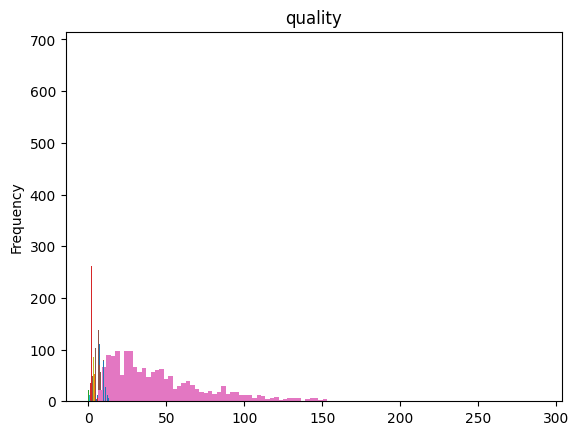

In [ ]:
for i in range(len(list_columns)):
    df[list_columns[i]].plot(kind='hist', bins=100, title=list_columns[i])
    plt.gca().spines[['top', 'right',]].set_visible(False)

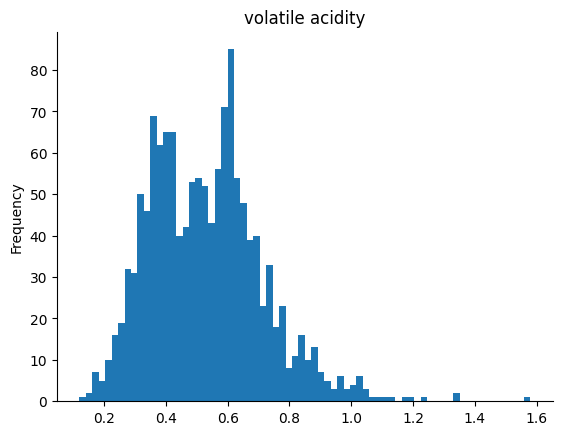

In [ ]:
"from matplotlib import pyplot as plt
df['volatile acidity'].plot(kind='hist', bins=70, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_empty = df.drop(columns=['alcohol'])

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Частотность значений в категориальном столбце
value_counts = df['residual sugar'].value_counts()
print(value_counts)

residual sugar
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
15.40      1
3.75       1
13.80      1
5.70       1
13.90      1
Name: count, Length: 91, dtype: int64


3.2. Проверка формата данных

Ошибки в формате данных, такие как неправильные типы данных (числа записаны как строки, даты записаны неправильно и т.п.), могут существенно повлиять на корректность анализа.

In [ ]:
# Проверка типов данных
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

In [ ]:
# Проверка типов данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB
None


In [ ]:
# Проверка на соответствие типу данных
print(df['chlorides'].dtype)

float64


3.3. Логические противоречия

Проверяйте логику данных: например, даты рождения не могут быть позже текущей даты, возраст не может быть отрицательным, цены не могут быть ниже нуля и т.д.

In [ ]:
# Проверка возраста
invalid_ages = df.query("chlorides < 0")
print(invalid_ages)

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


3.4. Регулярные выражения (regex)

Используйте регулярные выражения для поиска нестандартных шаблонов в текстовых данных, таких как некорректные адреса электронной почты, номера телефонов или ID.

In [ ]:
import re

emails = ['data@yandex.ru','data1@mail.com','data4@yahoo.com','data1@rambler.ru']
df_emails = pd.DataFrame({'emails': ['data@yandex.ru', 'data1@mail.com',
                                     'data4@yahoo.com', 'data1@rambler.ru', '4']})
df_emails

,emails
0,data@yandex.ru
1,data1@mail.com
2,data4@yahoo.com
3,data1@rambler.ru
4,4


In [ ]:
# Проверка email на валидность
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
valid_emails = df_emails['emails'].str.contains(email_pattern)
print(valid_emails.sum())  # Количество валидных адресов

4


3.5. Сравнение с эталонными данными

Если у вас есть проверенный набор данных (эталон), вы можете сравнить его с вашим набором, чтобы выявить расхождения.

In [ ]:
df_empty['chlorides'].drop(1)

,chlorides
0,0.076
2,0.092
3,0.075
5,0.075
6,0.069
...,...
1593,0.068
1594,0.090
1595,0.062
1597,0.075


In [ ]:
df_empty_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


In [ ]:
df_empty

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,5
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,5


In [ ]:
# Сравниваем два датафрейма на совпадение
df_etalon = df_empty
differences = df_empty_2.compare(df_etalon)
print(differences)

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

In [ ]:
1000 x 1000

3.6. Агрегатные функции и группировки

Использование агрегатных функций, таких как groupby, pivot_table и agg, может помочь выявить странные значения или ошибки, возникающие при сравнении данных внутри одной группы.

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Агрегация данных по категории
aggregated = df.groupby('category').agg({
    'price': ['min', 'max', 'mean'],
    'quantity': ['sum', 'count']
})

# Проверка минимальных и максимальных значений
outliers = aggregated.query("price_min < 0 or price_max > 10000")

3.7. Проверка целостности данных

Интегрированные проверки могут включать проверку ключевых ограничений, таких как уникальность идентификаторов, непротиворечивость связей между таблицами и выполнение бизнес-правил.

In [ ]:
# Проверка уникальности идентификаторов
assert not df['volatile acidity'].duplicated().any(), "Duplicate IDs found!"

AssertionError: Duplicate IDs found!

In [ ]:
# Проверка уникальности идентификаторов
assert not df['chlorides'].duplicated().any(), "Duplicate IDs found!"

# Проверка внешних ключей
assert set(df['foreign_key']).issubset(set(reference_df['key'])),
"Invalid foreign keys found!"

3.8. Валидация данных с использованием схемы

Если у вас есть заранее известная схема данных (например, JSON-схема), её можно использовать для автоматической проверки соответствия данных ожиданиям.

In [ ]:
from jsonschema import validate

schema = {
    "type": "object",
    "properties": {
        "name": {"type": "string"},
        "age": {"type": "integer", "minimum": 18},
        "email": {"format": "email"}
    },
    "required": ["name", "age"]
}

errors = []
for index, row in df.iterrows():
    try:
        validate(row.to_dict(), schema)
    except ValidationError as e:
        errors.append((index, e.message))

3.9. Генерация отчетов по качеству данных

Автоматизированные отчеты могут суммировать статистику качества данных, включая количество пропущенных значений, процент заполненных полей, наличие выбросов и другие метрики.

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
def generate_report(df):
    report = {}

    for col in df.columns:
        report[col] = {
            "missing_count": df[col].isnull().sum(),
            "unique_count": len(df[col].unique()),
            "outlier_count": sum(df[col] > df[col].quantile(0.99)),
            "most_common_value": df[col].mode()[0],
        }

    return report

generate_report(df)

{'fixed acidity': {'missing_count': np.int64(0),
  'unique_count': 96,
  'outlier_count': 14,
  'most_common_value': np.float64(7.2)},
 'volatile acidity': {'missing_count': np.int64(0),
  'unique_count': 143,
  'outlier_count': 15,
  'most_common_value': np.float64(0.6)},
 'citric acid': {'missing_count': np.int64(0),
  'unique_count': 80,
  'outlier_count': 16,
  'most_common_value': np.float64(0.0)},
 'residual sugar': {'missing_count': np.int64(0),
  'unique_count': 91,
  'outlier_count': 16,
  'most_common_value': np.float64(2.0)},
 'chlorides': {'missing_count': np.int64(0),
  'unique_count': 153,
  'outlier_count': 16,
  'most_common_value': np.float64(0.08)},
 'free sulfur dioxide': {'missing_count': np.int64(0),
  'unique_count': 60,
  'outlier_count': 16,
  'most_common_value': np.float64(6.0)},
 'total sulfur dioxide': {'missing_count': np.int64(0),
  'unique_count': 144,
  'outlier_count': 15,
  'most_common_value': np.float64(28.0)},
 'density': {'missing_count': np.int64(

3.10. Тестирование предположений

Иногда можно заранее предположить, какими должны быть данные, и провести тесты на соответствие этим предположениям.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Предположение: цена должна быть положительной
assert (df['quality'] > 0).all(), "Negative prices detected!"

In [ ]:
# Предположение: цена должна быть положительной
assert (df['price'] >= 0).all(), "Negative prices detected!"

# Предположение: имя клиента не должно содержать цифр
assert df['customer_name'].str.contains(r'\d').sum() == 0, "Customer names contain digits!"
df['customer_name'].str.contains(r'\d').sum()
df['customer_name'].str.contains(r'\d').sum()
df['customer_name'].str.contains(r'\d').sum()
df['customer_name'].str.contains(r'\d').sum()

KeyError: 'price'

3.11. Корреляционный анализ

Проверка корреляций между признаками может помочь выявить зависимые столбцы, которые могут вводить в заблуждение при анализе.

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [ ]:
corr_matrix = df.corr()
high_corr_vars = corr_matrix[abs(corr_matrix) > 0.8]
print(high_corr_vars)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                   1.0               NaN          NaN   
volatile acidity                NaN               1.0          NaN   
citric acid                     NaN               NaN          1.0   
residual sugar                  NaN               NaN          NaN   
chlorides                       NaN               NaN          NaN   
free sulfur dioxide             NaN               NaN          NaN   
total sulfur dioxide            NaN               NaN          NaN   
density                         NaN               NaN          NaN   
pH                              NaN               NaN          NaN   
sulphates                       NaN               NaN          NaN   
alcohol                         NaN               NaN          NaN   
quality                         NaN               NaN          NaN   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

3.12. Тензорное декомпозиции (Tensor Decomposition)

Методы декомпозиции, такие как CP или Tucker, могут помочь разложить многомерные данные на компоненты, которые легче интерпретируются и позволяют выявить аномалии.

In [ ]:
from tensorly.decomposition import parafac

tensor = tensorly.cp_decompose(df_tensor)

3.13. Алгоритмы поиска аномалий

Существует ряд алгоритмов, специально разработанных для поиска аномалий в данных, таких как Isolation Forest, Local Outlier Factor (LOF) и One-Class SVM.

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0)
predictions = clf.fit_predict(df)
anomalies = predictions[predictions == -1]

3.14. Совместимость типов данных

Проверка совместимости типов данных может помочь выявить ошибки, вызванные несовместимостью типов (например, строка вместо числа).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [ ]:
expected_types = {'chlorides': float, 'density': object, 'pH': float}

for col, dtype in expected_types.items():
    assert df[col].dtype == dtype, f"Column {col} has incorrect type!"

AssertionError: Column density has incorrect type!

3.15. LOF (Local Outlier Factor)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Генерация тестовых данных
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# Создание и обучение модели LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# Получение оценок аномальности
X_scores = lof.negative_outlier_factor_

3.16. Autoencoders

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Генерация тестовых данных
np.random.seed(42)
X = np.random.normal(0, 1, (1000, 10))
X_anomaly = np.random.normal(5, 1, (50, 10))
X = np.vstack([X, X_anomaly])

# Создание и обучение автоэнкодера
input_dim = X.shape[1]
encoding_dim = 3

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Обучение
autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Получение оценок аномальности
reconstructions = autoencoder.predict(X)
reconstruction_errors = np.mean((X - reconstructions) ** 2, axis=1)

3.17. One-Class SVM

In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np

# Генерация тестовых данных
np.random.seed(42)
X = np.r_[np.random.randn(200, 2) + [2, 2],
          np.random.randn(30, 2) + [-2, -2]]

# Создание и обучение модели One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
y_pred = ocsvm.fit_predict(X)

# Получение оценок аномальности
anomaly_scores = ocsvm.decision_function(X)